# W6D4 Introduction to Machine Learning

## Agenda
1. Machine Learning
    - Supervised vs. Unsupervised Learning
2. Supervised Learning
    - `X` and `y`
    - Regression vs. Classification    
    - The golden rule: train/test split
3. Simple Linear Regression
4. Polynomial Regression

### Definition of ML / What is ML?

Seen as a subset of AI. ML algorithms build a model based on sample data (training data), in order to make predictions without being explicitly programmed to do so.

A field of study that gives computers the ability to learn without being explicitly programmed.
– Arthur Samuel (1959)

### Supervised vs. Unsupervised

### Supervised Learning
- In supervised learning, we have a set of observations (__*X*__) with an associated target (__*y*__)
- We wish to find a model function that relates __*X*__ to __*y*__
- Then use that model function to predict future observations

 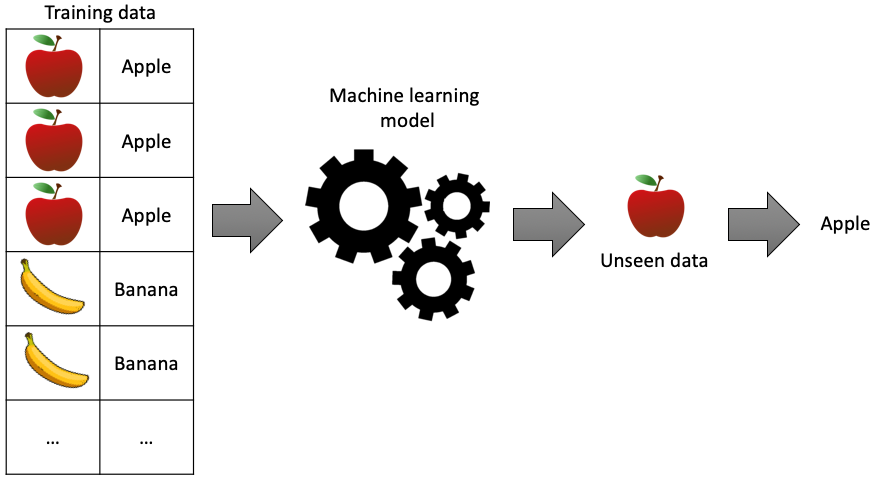

### Unsupervised Learning
- We have __*X*__ (the data) but no __*y*__ (associated target)

 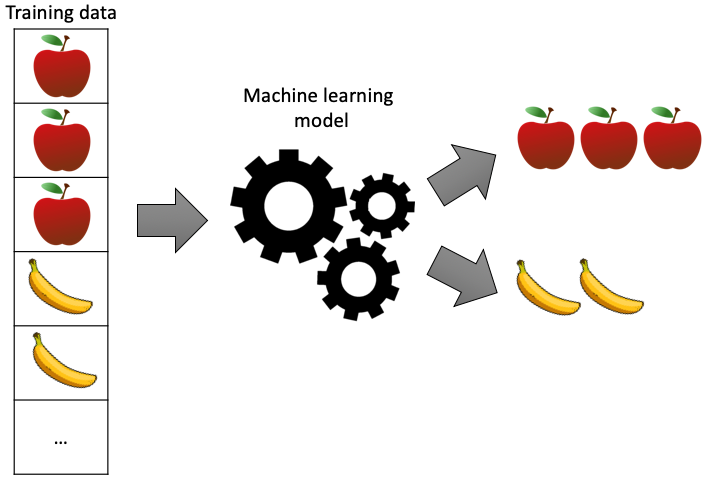

### Types of Supervised Learning: Regression and Classification

### Classification vs. Regression

* Classification problems: predicting among two or more categories, also known as classes
    - Predict whether a patient has a liver disease or not
    - Predict what the letter grade of a student will be (A, B, C, D or F)

* Regression problem: predicting a continuous value (in other words, a number)
    - Predict house prices
    - Predict someone's age from their photo

### Linear Regression

- Linear regression is one of the most basic and popular ML/statistical techniques
- Used as a predictive model
- Assumes a linear relationship between the dependent variable (which is the variable we are trying to predict/estimate, **y**) and the independent variable/s (input variable/s used in the prediction, **X**)

#### Let's start with **simple** linear regression
- Only one independent/input variable is used to predict the dependent variable

### Simple Linear Regression

$\hat{y} = wx + b$

$\hat{y}$ = Dependent variable

$b$ = Constant

$w$ = Coefficients

$x$ = Independent variable

### Multiple Linear Regression
$\hat{y} = w_1x_1 + w_2x_2 + ... + b$
- Many $x$'s and $w$'s
- The larger the value of $w_i$, the more influence $x_i$ has on the target $\hat{y}$

### Matrix representation

$\hat{y} = w^Tx + b$
- $\hat{y}$ is the linear function of features $x$ and weights $w$.       
- $\hat{y} \rightarrow$ prediction
- $w \rightarrow$ weight vector
- $b \rightarrow$ bias
- $x \rightarrow$ features

$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x_1 \\ x_2 \\ \vdots \\ x_d\end{bmatrix} + b$

### Matrix representation for multiple predictions

$\hat{y} = w^TX + b$
        

$\hat{y} = \begin{bmatrix}w_1 & w_2 & \cdots & w_d\end{bmatrix}\begin{bmatrix}x^{(1)}_1 & x^{(2)}_1 & \ldots &x^{(n)}_1\\ x^{(1)}_2 & x^{(2)}_2 & \ldots & x^{(n)}_2 \\ \vdots & \vdots & \ldots \\ x^{(1)}_d & x^{(2)}_d & \ldots & x^{(n)}_d\end{bmatrix} + b$

### Let's try it!

Let's start simple and imagine we have a dataset of height and weight. Let height be our feature and weight our Target.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
df = pd.read_csv('weight_height.csv', usecols=['Height', 'Weight'])
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [89]:
# use height to predict weight
X = df['Height'].values.reshape(-1, 1)
y = df['Weight'].values

In [90]:
df['Height'].values.reshape(-1, 1)

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [91]:
df[['Height']].values

array([[73.84701702],
       [68.78190405],
       [74.11010539],
       ...,
       [63.86799221],
       [69.03424313],
       [61.94424588]])

In [92]:
# fit the model
from sklearn.linear_model import LinearRegression

# lr = LinearRegression(fit_intercept=False) # usually you would have an intercept
lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

In [93]:
# let's see some predictions
y_pred = lr.predict(X)

In [94]:
# coefficient
lr.coef_

array([7.71728764])

In [95]:
# intercept
lr.intercept_

-350.7371918121362

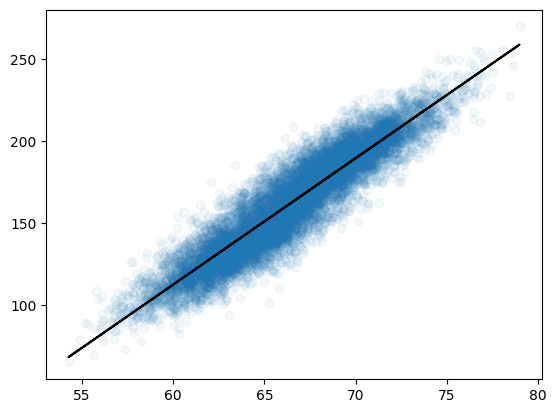

In [10]:
# plot data and model line
plt.scatter(X, y, alpha=0.05)
plt.plot(X, y_pred, color='black')
plt.show()

In [96]:
# score the model
lr.score(X, y)

0.8551742120609958

### The golden rule

- When you're doing supervised learning, once you've identified **X** and **y**...
- **You need to split your data into train and test**
- **You only work with the training data**

### Why?
- As soon as you start making decisions on what features to include, drop etc., you are letting a part of the test data influence your decision-making
- Your results will not be truly representative of "unseen data"

### The big picture
- We train using the **training data**
- We test what is learned by the model on the **test data**
- We have two scores: **training** vs. **test**

### Which matters more?
- It doesn't matter how good our **training score** is because the **test score is what matters**
- Good models that generalize well though will have **similar training and testing scores**

**We want to pick models that generalize well to unseen data**

### The fundamental tradeoff

| Model | Training Score relative to Test Score | Performance |
|:-|:-|:-|
| Too Complex|High training score compared to test score| Overfit |
|Too Simple|Low training score and low test score|Underfit|

- Models that have **extremely high training scores** (that are too good to be true) that are **highly complex** that learned very complex relationships in the training data **can be overfit**
- On the other hand, models that have **low training scores** that are **very simple** may not have learned the necessary relationships in the training data needed to predict well on unseen data; they are **underfit**

![img](https://miro.medium.com/max/2250/1*_7OPgojau8hkiPUiHoGK_w.png)

### Minimizing approximation error...
... means that our model generalizes well


$E_{approx} = (E_{test} - E_{train})$

- There is generally a "tradeoff" between complexity and test error
- A more complex model will fit closer to the peculiarities of the training data
    - i.e., $E_{approx}\;$ tends to get bigger as our model becomes more complex
- This means it will likely not generalise well to new data!
- $E_{approx}\;$ tends to get smaller with more data

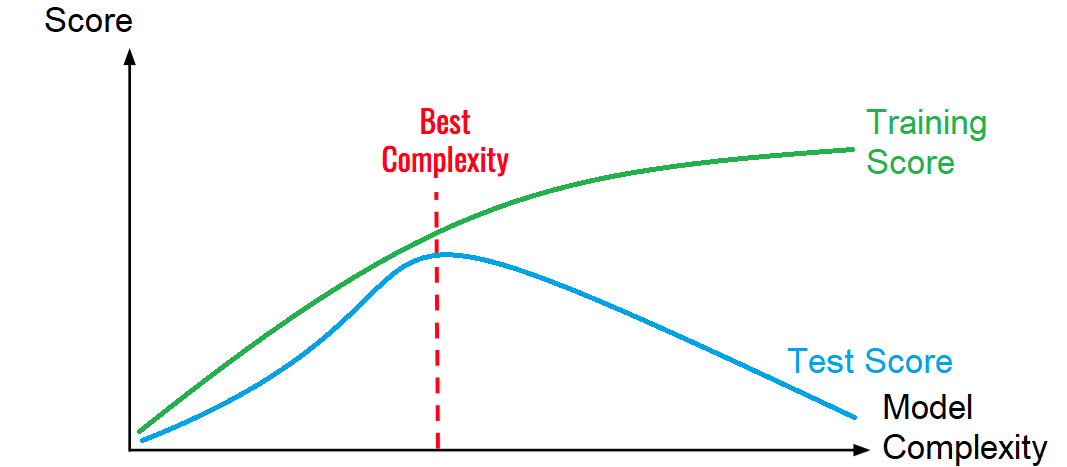

### The fundamental tradeoff (part 2)
... In the "bias-variance" language

- **The bias error** is an error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
- **The variance** is an error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

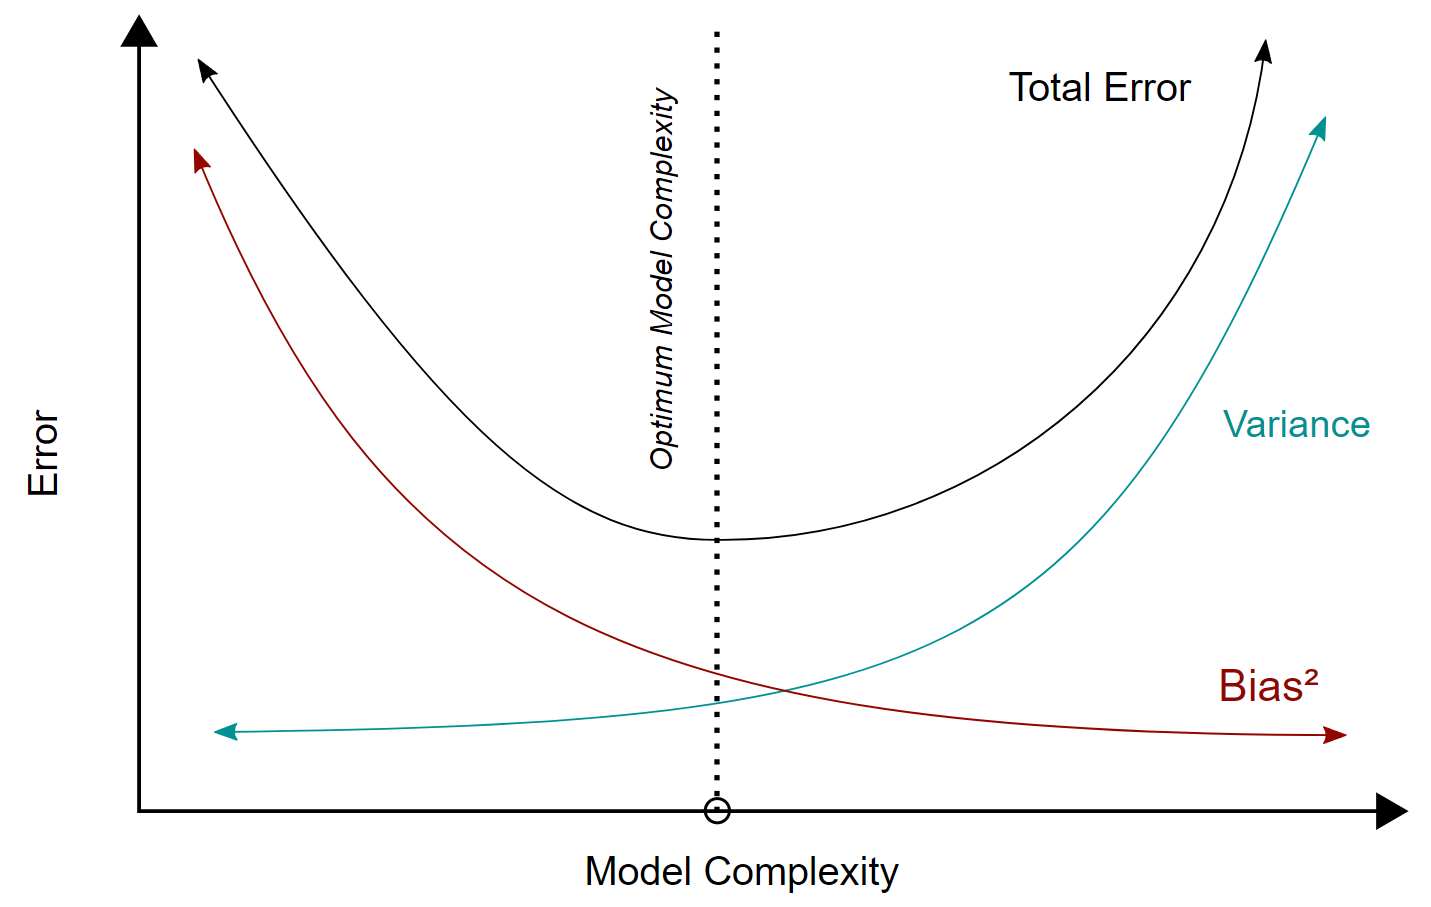

### Let's load the California Housing Data Set

[Documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset)

In [97]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [99]:
california = pd.read_csv('housing.csv')
california.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [100]:
# look at info
california.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [101]:
# drop rows with missing data
california = california.dropna()

In [102]:
california.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


### The golden rule
- **You need to split your data into train and test**


### So... how do we split?
- Most common way is to use `train_test_split` in `sklearn`
- Shuffles the data first and then splits it
- 80/20, 75/25, 70/30 are common splits

### Splitting out our X and y
- In this case, we are working with a regression problem. Could you say why?
- What are the features?
- What is the target?

In [104]:
# use all features except ocean proximity to predict median house value
X = california.drop(['median_house_value', 'ocean_proximity'], axis=1)
y = california['median_house_value']

In [105]:
# split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
X.shape

(20433, 8)

In [106]:
# look at train and test shapes
X_train.shape, X_test.shape

((16346, 8), (4087, 8))

In [108]:
# verify proportion
X_train.shape[0] / (X_test.shape[0] + X_train.shape[0])

0.799980423824206

In [109]:
# basic EDA (describe)
X_train.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000,16346.000000
mean,-119.580513,35.640569,28.615013,2626.293466,536.057751,1420.589991,497.613483,3.870697
std,2.005898,2.136181,12.577173,2153.306818,417.470689,1129.376716,377.997450,1.897825
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900
25%,-121.810000,33.930000,18.000000,1450.000000,295.250000,787.000000,280.000000,2.564550
50%,-118.510000,34.260000,29.000000,2125.000000,434.000000,1165.000000,408.000000,3.536650
75%,-118.010000,37.720000,37.000000,3131.750000,646.000000,1720.000000,603.000000,4.750000
max,-114.470000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100


## Scaling the data

In [110]:
# scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
# scaler = MinMaxScaler()

# scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)

X_train_scaled = scaler.fit_transform(X_train) # always fit on just the training data
X_test_scaled = scaler.transform(X_test) # use the same scaling object to transform ONLY on the test data

In [113]:
# visualize scaled EDA
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.106514,0.786208,-1.162062,0.829311,0.929297,1.131110,1.040744,0.438412
1,-0.024671,0.467873,0.348657,-0.738558,-0.850523,-0.708899,-0.856152,-0.242389
2,0.758045,-0.711838,-0.287435,0.587350,0.747242,0.378459,0.691525,-0.108969
3,0.633408,-0.735245,-0.048901,-0.122742,0.989183,1.185124,1.048681,-0.861168
4,1.151895,-1.217429,-0.128412,-0.365632,-0.345083,-0.105008,-0.247664,-0.168986
...,...,...,...,...,...,...,...,...
16341,0.802914,-0.899094,-0.366947,0.169376,-0.086375,0.014531,-0.118029,0.820914
16342,1.017288,-0.880369,-1.877666,1.495284,1.195192,1.626974,1.331760,0.487838
16343,0.578568,-0.763334,1.064261,-0.479414,-0.400179,-0.414923,-0.358779,-0.406634
16344,-1.226165,0.903243,-1.321086,1.436303,1.264660,1.784588,1.479914,0.746774


In [112]:
pd.DataFrame(X_test_scaled, columns=X_test.columns).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000,4087.000000
mean,0.024488,-0.017197,0.007187,0.023708,0.021710,0.019288,0.024072,0.001224
std,0.994116,1.000425,1.005936,1.072109,1.046015,1.016858,1.055610,1.004010
min,-2.308008,-1.442136,-2.195713,-1.212263,-1.276914,-1.253464,-1.308550,-1.776191
25%,-1.036718,-0.800785,-0.844016,-0.546058,-0.572651,-0.556598,-0.578364,-0.689677
50%,0.553641,-0.650980,0.030611,-0.230022,-0.234893,-0.221890,-0.218562,-0.176153
75%,0.782972,0.968782,0.666703,0.262723,0.276536,0.281057,0.286748,0.442864
max,2.627589,2.911561,1.859377,16.398864,11.821412,13.017676,12.411539,5.864474


## Training the model

In [114]:
# fit a LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [115]:
# look at coefficients
pd.DataFrame(lr.coef_, index=X_train.columns, columns=['coef']).sort_values(by='coef', ascending=False)

,coef
median_income,76467.239870
total_bedrooms,48354.307406
households,15739.496561
housing_median_age,14527.411388
total_rooms,-18174.254702
population,-41513.225960
longitude,-85341.725905
latitude,-90434.670781


In [116]:
# look at intercept
lr.intercept_

206644.4000978828

Let’s try to make some sense of it here!

We can use these coefficients to interpret our model. They show us how much each of these features affect our model’s prediction.

### Predicting

In [117]:
# make prediciton
lr.predict(X_test_scaled)

array([197058.03752153, 157508.79088918, 202099.26270387, ...,
       131098.67538845, 155468.78077784, 166363.59962369])

## Prediction By Hand

$\hat{y} = w_1x_1 + w_2x_2 + ... + w_8x_8 + b$

In [82]:
# use coefficients and intercept to make the prediction
[(X_test_scaled[i] * lr.coef_).sum() + lr.intercept_ for i in range(10)]

[197058.0375215328,
 157508.79088917834,
 202099.26270386865,
 173501.82273783535,
 213795.18417457736,
 108004.59572813782,
 284796.0440563967,
 249128.96413381485,
 391338.74160318077,
 49301.348500163236]

### Results interpretation

- Weights (coef_)
- Bias (intercept_)

- **R-squared** measures the proportion of the variation in your dependent variable (y) explained by your independent variables (X) for a linear regression model
- **Adjusted R-squared** adjusts the statistic based on the number of independent variables in the model

**What does that mean?**

* $R^2$ is a measure of fit
  
* It indicates how much variation of a dependent variable is explained by the independent variables
  
* An R-squared of 100% means that $y$ is completely explained by the independent variables


$R^2 = 1 - \frac{Unexplained Variation}{TotalVariation}$

$R^2 = 1 - \frac{RSS}{TSS}$

$R^2	=	$   coefficient of determination

$RSS	=	$  sum of squares of residuals
 
$RSS =\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}$

$TSS	=	$   total sum of squares

$TSS=\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}$

$\bar{y}$ = mean value

Thus,

$
R^2 = 1 - \frac{\sum_{i=1}^{n}(y_{i}-{\hat{y}})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}
$

In [118]:
# calculate some metrics
print('train r-squared: ', lr.score(X_train_scaled, y_train))
print('test r-squared: ', lr.score(X_test_scaled, y_test))

train r-squared:  0.6360185727313742
test r-squared:  0.6400865688993735


In [32]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, lr.predict(X_test_scaled))) # to get original units

70156.12045736387

## Understanding $R^2$

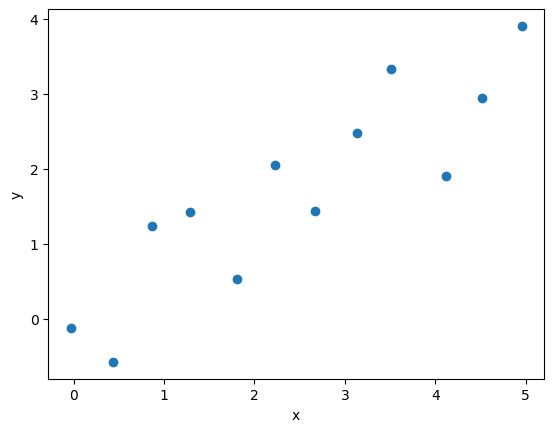

In [119]:
n = 12
d = 2

x = np.linspace(0,5,n)  + np.random.randn(n)*0.05
y = x*0.7 + np.random.randn(n)*0.5
X = x[:,None]

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y');

In [120]:
def make_plot(lr, x, y):
    grid = np.linspace(np.min(x)-0.3,np.max(x)+.3,1000)[:,None]

    plt.scatter(x, y, label="training data")
    plt.xlabel('x')
    plt.ylabel('y');
    plt.plot(grid, lr.predict(grid), 'black', label="model")

    yhat = lr.predict(x[:,None])

    for i in range(len(y)):
        if i == 0:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red', label="residuals")
        else:
            plt.plot((x[i],x[i]),(y[i],yhat[i]), 'red')

    plt.legend(fontsize=12)

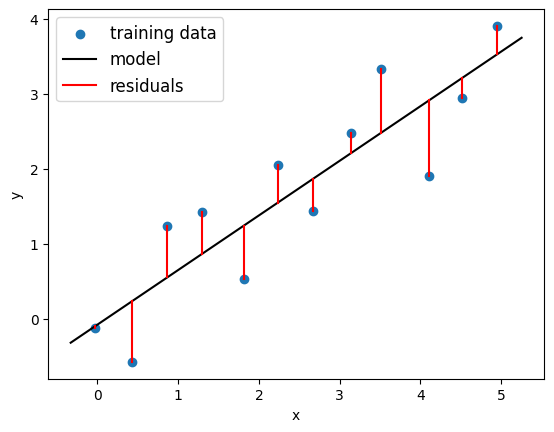

In [121]:
lr = LinearRegression()
lr.fit(X, y)
make_plot(lr, x, y)

In [122]:
# TSS
((y - y.mean())**2).sum()

20.107318167143962

In [37]:
# RSS
((y - lr.predict(X))**2).sum()

2.8660369157837184

In [123]:
# R^2
1 - (((y - lr.predict(X))**2).sum() / ((y - y.mean())**2).sum())

0.7795494639668906

### Polynomial regression

### Non-linear regression motivation
- Linear regression might seem rather limited.
- What if the true relationship between the target and the features is non-linear?


**We still use the linear regression framework, but create quadratic, cubic etc. features**

## Let's see an example

In [124]:
n = 20
X = np.linspace(-3,3,n)
y = X**2 + np.random.randn(n)

# transforming the data to include another axis
X = X[:, np.newaxis]
y = y[:, np.newaxis]

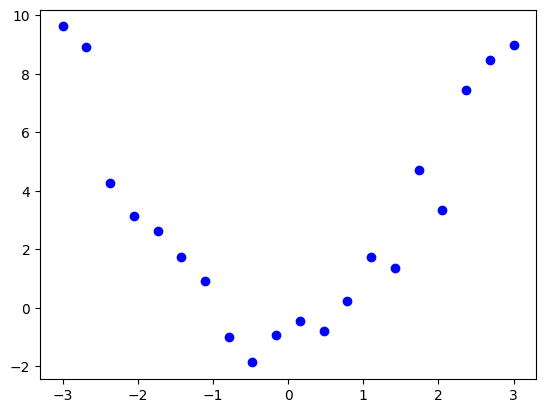

In [125]:
plt.scatter(X, y, color='blue');

## Fitting a linear regression line

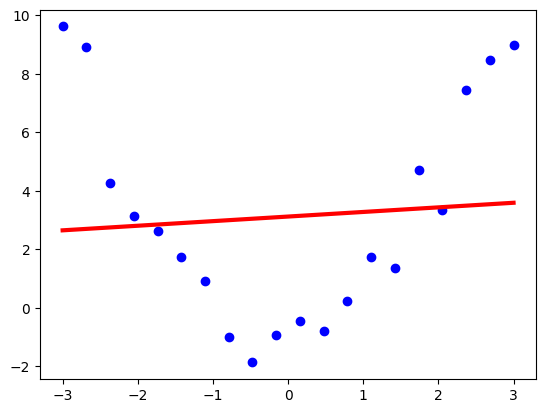

In [126]:
lr = LinearRegression()

lr.fit(X, y)
preds = lr.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red', linewidth=3)
plt.show()

In [127]:
lr.score(X, y)

0.006090638353364208

### Using polynomial features

In [128]:
from sklearn.preprocessing import PolynomialFeatures

In [129]:
deg = 2
poly_feats = PolynomialFeatures(degree=deg)

X_deg = poly_feats.fit_transform(X)

X_poly_feat_names = poly_feats.get_feature_names_out(['x'])

df_poly = pd.DataFrame(X_deg, columns=X_poly_feat_names)
df_poly['y'] = y

In [130]:
df_poly.head()

,1,x,x^2,y
0,1.0,-3.000000,9.000000,9.622760
1,1.0,-2.684211,7.204986,8.924968
2,1.0,-2.368421,5.609418,4.259599
3,1.0,-2.052632,4.213296,3.156556
4,1.0,-1.736842,3.016620,2.611475


## Fitting polynomial features


What sklearn does is - If you substitute $x^2$ as another variable such as `m`, then the equation now is:

`y=w*m + b`  

The relation between `y` and `m` is linear but it is not linear between `x` and `y`.

Because of this "technically", it is linear regression just the variables between which it happens is $x^2$ (`m`) and `y` and not `x` and `y`.

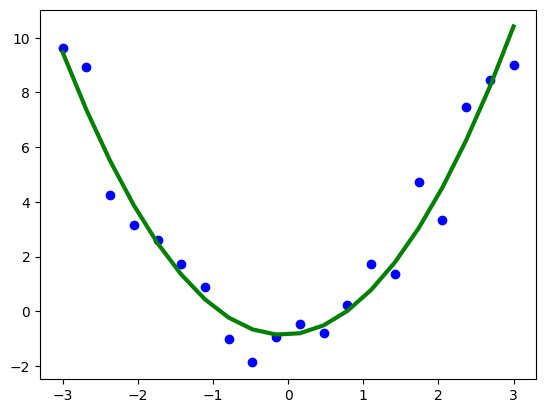

In [131]:
lr_poly = LinearRegression()

lr_poly.fit(X_deg, y)

preds = lr_poly.predict(X_deg)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='green', linewidth=3);

In [132]:
lr_poly.coef_

array([[0.        , 0.15713726, 1.19941593]])

In [136]:
lr_poly.intercept_

array([-0.85510076])

In [137]:
lr_poly.score(X_deg, y)

0.9402980937227847